# Final Report: Analyzing Parking Violations in Bonn, Germany: Trends, Patterns, and Insights




# Table of Content

1. Introduction
2. Methodology
3. Install dependencies
4. Data Description
    - Data Transformation
    - Data Loading
    - Initial rows of datasets
    - Dimensions of the datasets
    - Information about the datasets, including column datatypes
5. Results, Findings and Interpretations
6. Conclusion

# 1. Introduction

Parking violations can cause inconvenience and frustration for both motorists and local authorities. Understanding the patterns, locations, and trends of parking violations is crucial for effective enforcement and the implementation of targeted solutions. This report aims to provide insights into the frequency and distribution of parking violations during the years 2020 and 2021. By analyzing specific locations, days, hours, and overall fine amounts, we can gain valuable information to enhance parking management strategies and optimize enforcement efforts.

# 2. Methodology

In this project, open data obtained from Mobilithek is utilized. The data sources for the years 2020 and 2021 are as follows: 
 - 2020 data can be accessed from https://opendata.bonn.de/sites/default/files/ParkverstoesseBonn2020_0.csv 
 - 2021 data can be accessed from https://opendata.bonn.de/sites/default/files/Parkverst%C3%B6%C3%9Fe%202021.csv 

These datasets specifically contain information about the warnings and fines (referred to as "knolls/tickets") that were issued for parking violations within the city area of Bonn during the mentioned years.

The question that interests us is: 

**1. Are there any specific locations or areas where parking violations are more frequent in 2020 and 2021 together?**
**2. Are there certain days or hours of the week when parking violations are more common?**
**3. Is there an increase in the overall amount of parking fines?**

# 3. Install dependencies
Initially, install all required dependencies.

In [ ]:
%pip install pandas
%pip install numpy
%pip install openpyxl
%pip install sqlalchemy
%pip install matplotlib
%pip install seaborn

# 4. Data description



- Data Transformation

    The initial datasets underwent the following data transformations:

    1. Renaming erroneous column name
    2. Replacing column & row data errors

- Data Loading

    Created a pandas dataframe using the local sqlite file.

In [5]:
import pandas as pd

csv_df_2020 = pd.read_sql_table('Verwarn- und Bußgelder ruhender Verkehr (Parkverstöße) 2020', 'sqlite:///AMSE_database.db')
csv_df_2021 = pd.read_sql_table('Verwarn- und Bußgelder ruhender Verkehr (Parkverstöße) 2021', 'sqlite:///AMSE_database.db')

- Initial rows of dataset 1

    Verwarn- und Bußgelder ruhender Verkehr (Parkverstöße) 2020

In [6]:
csv_df_2020.head(10)

,TATTAG,TATZEIT,TATORT,TATBESTANDBE_TBNR,GELDBUSSE,BEZEICHNUNG
0,01.01.2020,100,Alte Schulstr. 56 (Stichstr.),112404,30,PKW
1,01.01.2020,1606,"Bonn, Lyngsbergstraße 108",112293,15,PKW
2,01.01.2020,1505,"Bonn, Münsterstraße gegenüber Hnr. 1a/3",142278,35,PKW
3,01.01.2020,1606,"Bonn, Siemensstraße Parkplatz Sirius",329610,60,PKW
4,01.01.2020,1645,"Bonn, Weiherstr. 29",142252,10,PKW
5,01.01.2020,1300,"Bonn, Weiherstraße 27",142252,10,PKW
6,01.01.2020,1515,Maximilianstr. 6,142278,35,PKW
7,01.01.2020,1325,Maximilianstr. 6,142278,35,PKW
8,01.01.2020,1054,Wörthstr. 60,141324,25,PKW
9,02.01.2020,915,"Bonn, Adolfstraße 104",142252,10,PKW


- Initial rows of dataset 2

    Verwarn- und Bußgelder ruhender Verkehr (Parkverstöße) 2021

In [7]:
csv_df_2021.head(10)

,TATTAG,TATZEIT,TATORT,TATBESTANDBE_TBNR,GELDBUSSE,BEZEICHNUNG
0,01.01.2021,1137,"Bonn, Görlitzer Straße gegenüber Laterne3",141312,15,PKW
1,01.01.2021,1131,"Bonn, Marienburger Straße gegenüber Laterne1",112402,20,PKW
2,01.01.2021,1118,"Bonn, Memelweg gegenüber Hnr. 4",112402,0,"Kleintransporter (unter 3,5 t zGG)"
3,01.01.2021,1120,"Bonn, Memelweg gegenüber von Laterne 4",112402,20,PKW
4,01.01.2021,1119,"Bonn, Memelweg Wendefläche",112402,20,PKW
5,01.01.2021,1120,"Bonn, Memelweg Wendefläche",112402,20,PKW
6,01.01.2021,1140,"Bonn, Oppelner Straße 25",900420,25,PKW
7,01.01.2021,1134,"Bonn, Schneidemühler Straße gegenüber Hnr. 19",141312,15,PKW
8,01.01.2021,1126,"Bonn, Stettiner Straße 21",141312,15,PKW
9,01.01.2021,1128,"Bonn, Stettiner Straße Container",112402,20,PKW


- Dimensions of the dataset

In [8]:
# Check the dimensions of the dataset 1
print ("Dataset 1:")
print(csv_df_2020.shape)

# Check the dimensions of the dataset 2
print ("\nDataset 2:")
print(csv_df_2021.shape)

Dataset 1:
(107907, 6)

Dataset 2:
(109880, 6)


- Information about the dataset, including column datatypes

In [9]:
print("Basic info : DataSet 1\n")
csv_df_2020.info()

print("\nBasic info : DataSet 2\n")
csv_df_2021.info()

Basic info : DataSet 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107907 entries, 0 to 107906
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   TATTAG             107907 non-null  object
 1   TATZEIT            107907 non-null  int64 
 2   TATORT             107907 non-null  object
 3   TATBESTANDBE_TBNR  107907 non-null  int64 
 4   GELDBUSSE          107907 non-null  object
 5   BEZEICHNUNG        107888 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.9+ MB

Basic info : DataSet 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109880 entries, 0 to 109879
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   TATTAG             109880 non-null  object
 1   TATZEIT            109880 non-null  int64 
 2   TATORT             109880 non-null  object
 3   TATBESTANDBE_TBNR  109880 non-null  int64 
 4   GELD

# 5. Results, Findings & Interpretation

#### Are there any specific locations or areas where parking violations are more frequent in 2020 and 2021 together?

To answer our first question, we use seaborn and pyplot to create a bar plot to visualize the highest violation counts. Due to the large number of unique locations, we focus solely on the top 20 locations with the highest violation counts, as this ensures the graph remains manageable. 

By merging the parking violation data for 2020 and 2021, we calculate the frequency of violations for each location and proceed to plot the bar graph. This visualization aids in identifying the locations in Bonn where parking violations occur most frequently.

By utilizing the `TATORT` column, the code assigns different colors to the bars representing each location in the bar plot.

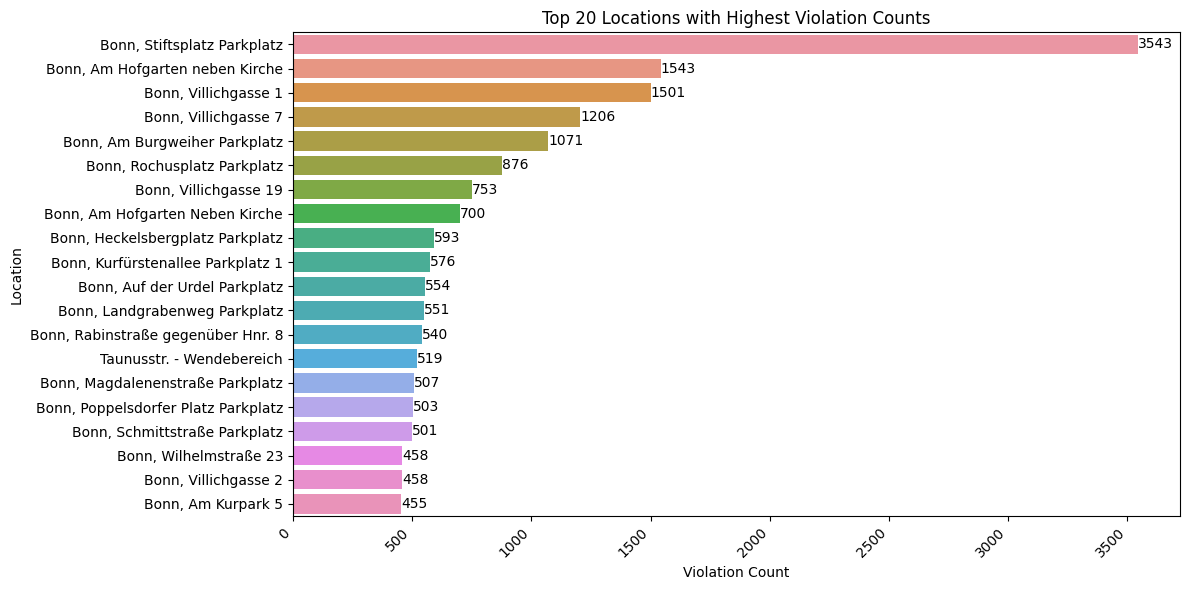

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the 2020 and 2021 data
combined_data = pd.concat([csv_df_2020, csv_df_2021])

# Group the violations by location and count the frequency
violation_counts = combined_data['TATORT'].value_counts()

# Plot the top 20 locations with the highest violation counts
top_20_locations = violation_counts.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_locations.values, y=top_20_locations.index)
plt.title('Top 20 Locations with Highest Violation Counts')
plt.xlabel('Violation Count')
plt.ylabel('Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ensures all labels are visible

# Add count labels to each bar
for i, count in enumerate(top_20_locations.values):
    plt.text(count, i, str(count), va='center')

plt.show()

#### Are there certain months or days or hours of the week when parking violations are more common?

To answer our second question, we use 'TATTAG' as Date column, 'TATZEIT' as Time column to analyze parking violation data for the years 2020 and 2021 in Bonn. It converts the date columns to the datetime format and extracts the month, day, and hour from the data. The violations are then grouped by day of the week, month, and hour. 

The code helps to identify and report the most frequent time periods for parking violations, allowing for a better understanding of the temporal patterns and trends in parking offenses in Bonn during 2020 and 2021.

In [11]:
import pandas as pd

# Convert the 'Violation Date' column to datetime format for 2020 and 2021 data
csv_df_2020['TATTAG'] = pd.to_datetime(csv_df_2020['TATTAG'], format="%d.%m.%Y")
csv_df_2021['TATTAG'] = pd.to_datetime(csv_df_2021['TATTAG'], format="%d.%m.%Y")

# Extract the month, day, and hour from the 'TATTAG' and 'TATZEIT' columns
csv_df_2020['MONTH'] = csv_df_2020['TATTAG'].dt.month
csv_df_2020['HOUR'] = csv_df_2020['TATZEIT'].apply(lambda x: int(str(x)[:2]) if str(x).isdigit() and int(x) < 2400 else 0)
csv_df_2021['MONTH'] = csv_df_2021['TATTAG'].dt.month
csv_df_2021['HOUR'] = csv_df_2021['TATZEIT'].apply(lambda x: int(str(x)[:2]) if str(x).isdigit() and int(x) < 2400 else 0)

# Group the violations for 2020 and 2021 by day of the week, month, and hour of the day
grouped_data_2020 = csv_df_2020.groupby([csv_df_2020['TATTAG'].dt.dayofweek, csv_df_2020['MONTH'], csv_df_2020['HOUR']]).size()
grouped_data_2021 = csv_df_2021.groupby([csv_df_2021['TATTAG'].dt.dayofweek, csv_df_2021['MONTH'], csv_df_2021['HOUR']]).size()

# Get the day, month, and hour with the highest number of violations for 2020 and 2021
max_violations_month_day_hour_2020 = grouped_data_2020.idxmax()
max_violations_month_day_hour_2021 = grouped_data_2021.idxmax()

# Convert day, month, and hour indices to human-readable format
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
hour_map = {h: f'{h:02}:00 - {h+1:02}:00' for h in range(24)}
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

most_common_day_2020 = day_map[max_violations_month_day_hour_2020[0]]
most_common_month_2020 = month_map[max_violations_month_day_hour_2020[1]]
most_common_hour_2020 = hour_map[max_violations_month_day_hour_2020[2]]

most_common_day_2021 = day_map[max_violations_month_day_hour_2021[0]]
most_common_month_2021 = month_map[max_violations_month_day_hour_2021[1]]
most_common_hour_2021 = hour_map[max_violations_month_day_hour_2021[2]]

# Print the results for 2020
print(f"For 2020: \nthe most common Month for parking violations is {most_common_month_2020}, \nthe most common Day is {most_common_day_2020}, \nthe most common Hour is {most_common_hour_2020}.")

# Print the results for 2021
print(f"\nFor 2021: \nthe most common Month for parking violations is {most_common_month_2021}, \nthe most common Day is {most_common_day_2021}, \nthe most common Hour is {most_common_hour_2021}.")


For 2020: 
the most common Month for parking violations is January, 
the most common Day is Thursday, 
the most common Hour is 11:00 - 12:00.

For 2021: 
the most common Month for parking violations is September, 
the most common Day is Thursday, 
the most common Hour is 10:00 - 11:00.


#### Is there an increase in the overall amount of parking fines?

To answer our third question, we used 'GELDBUSSE' column to determine the overall amount of parking fines in Bonn for the years 2020 and 2021. 

In 2020, the total amount of parking fines collected was €1,851,284. This indicates the cumulative sum of all the fines issued for parking violations in the city during that year.

In 2021, the total amount of parking fines significantly increased to €19,737,777. This suggests a substantial rise in the fine amounts collected compared to the previous year.

These figures reflect the financial penalties imposed for parking violations and indicate the magnitude of the fines collected by the authorities in Bonn during the respective years.

For better readability and comprehension of the values matplotlib.ticker.StrMethodFormatter() is used to format the y-axis tick labels as comma-separated integers.

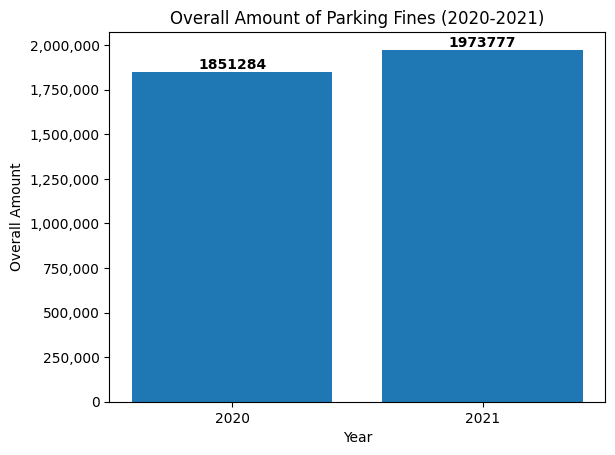

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'GELDBUSSE' column to numeric
csv_df_2020['GELDBUSSE'] = pd.to_numeric(csv_df_2020['GELDBUSSE'], errors='coerce')
csv_df_2021['GELDBUSSE'] = pd.to_numeric(csv_df_2021['GELDBUSSE'], errors='coerce')

# Calculate the total amount of fines for each year
overall_amount_2020 = csv_df_2020['GELDBUSSE'].sum()
overall_amount_2021 = csv_df_2021['GELDBUSSE'].sum()

# Create bar chart
years = ['2020', '2021']
overall_amount = [overall_amount_2020, overall_amount_2021]

plt.bar(years, overall_amount)

# Set chart title and axes labels
plt.title("Overall Amount of Parking Fines (2020-2021)")
plt.xlabel("Year")
plt.ylabel("Overall Amount")

# Format y-axis tick labels
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add count annotations to the bars
for i, v in enumerate(overall_amount):
    plt.text(i, v, str(int(v)), ha='center', va='bottom', fontweight='bold')

# Display the chart
plt.show()

# 6. Conclusion

The analysis of parking violations in 2020 and 2021 collectively identified specific locations or areas where violations occurred more frequently. These high-frequency zones can be targeted for improved enforcement or interventions.

By examining the data, it was determined that certain days or hours of the week experienced a higher occurrence of parking violations. This information can be utilized to optimize resource allocation and enforcement efforts during peak violation periods.

The data analysis indicated an increase in the overall amount of parking fines. This suggests a potential need for enhanced enforcement measures or public awareness campaigns to address the issue and encourage compliance with parking regulations.

These findings provide valuable insights for policymakers, law enforcement agencies, and urban planners to develop strategies for effective parking management and enforcement. Further analysis and continued monitoring are recommended to evaluate the long-term impact of any interventions implemented based on these insights.